In [1]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 93s 1us/step


# Visualizing the Dataset

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
single_image = x_train[50]

In [10]:
single_image

array([[[ 16,  76,  74],
        [ 17,  77,  75],
        [ 17,  77,  75],
        ...,
        [ 62, 106,  87],
        [ 55,  99,  80],
        [ 51,  94,  75]],

       [[ 16,  76,  74],
        [ 16,  76,  74],
        [ 15,  75,  74],
        ...,
        [ 62, 109,  84],
        [ 58, 105,  80],
        [ 52, 100,  75]],

       [[ 16,  76,  74],
        [ 15,  75,  73],
        [ 15,  75,  73],
        ...,
        [ 57, 110,  79],
        [ 59, 111,  80],
        [ 56, 109,  78]],

       ...,

       [[ 96, 110, 138],
        [114, 127, 159],
        [119, 132, 167],
        ...,
        [128, 135, 153],
        [120, 130, 145],
        [117, 131, 142]],

       [[118, 132, 159],
        [100, 113, 145],
        [114, 126, 163],
        ...,
        [139, 146, 159],
        [131, 140, 153],
        [121, 134, 147]],

       [[144, 148, 173],
        [136, 140, 168],
        [105, 114, 143],
        ...,
        [145, 151, 170],
        [137, 144, 163],
        [131, 141, 158]]

In [11]:
single_image.shape

(32, 32, 3)

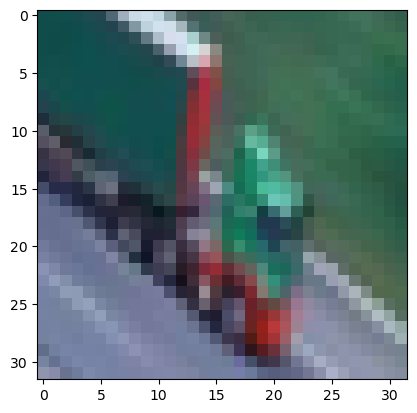

In [12]:
plt.imshow(single_image)

# Pre-processing

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_example = to_categorical(y_train)

In [17]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_example.shape

(50000, 10)

In [19]:
y_cat_train = to_categorical(y_train, 10)

In [20]:
y_cat_test = to_categorical(y_test, 10)

In [21]:
single_image.min()

8

In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
scaled_image = x_train[50]

In [24]:
scaled_image.max()

0.9529411764705882

In [25]:
scaled_image.min()

0.03137254901960784

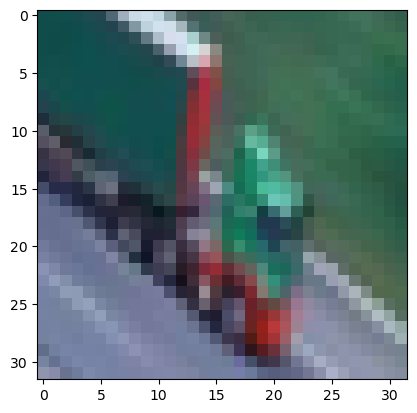

In [26]:
plt.imshow(scaled_image)

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
x_test.shape

(10000, 32, 32, 3)

# Model

In [140]:
model = Sequential()

model.add(Conv2D(filters = 48, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size=(4,4), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(132, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [141]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [142]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 29, 29, 48)        2352      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 32)        24608     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 800)               0         
                                                                 
 dense_30 (Dense)            (None, 132)             

In [143]:
model.fit(x_train, y_cat_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 22s 13ms/step - loss: 1.5291 - accuracy: 0.4456
Epoch 2/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.2277 - accuracy: 0.5647
Epoch 3/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0957 - accuracy: 0.6149
Epoch 4/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0004 - accuracy: 0.6499
Epoch 5/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9300 - accuracy: 0.6768
Epoch 6/15
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8711 - accuracy: 0.6944
Epoch 7/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8214 - accuracy: 0.7118
Epoch 8/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7778 - accuracy: 0.7288
Epoch 9/15
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7384 - accuracy: 0.7420
Epoch 10/15
1563/1563 [==============================] - 20s 13m

In [144]:
model.metrics_names

['loss', 'accuracy']

In [145]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0601 - accuracy: 0.6744


[1.0600515604019165, 0.6743999719619751]

In [146]:
import numpy as np

In [147]:
predictions=model.predict(x_test)
prediction_classes=np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 7ms/step


In [148]:
report = classification_report(y_test, prediction_classes)

print(report)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1000
           1       0.80      0.77      0.79      1000
           2       0.54      0.59      0.57      1000
           3       0.48      0.48      0.48      1000
           4       0.66      0.63      0.64      1000
           5       0.57      0.55      0.55      1000
           6       0.78      0.73      0.75      1000
           7       0.71      0.75      0.73      1000
           8       0.76      0.80      0.78      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

